<a href="https://colab.research.google.com/github/tomatozoo/data_visualization/blob/main/ZOOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ZOOM

* 멘토/멘티 발화 비율
* WordCloud

# Setting 

In [4]:
# install modules
%pip install stylecloud

# import modules
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager, rc
font_path = "/content/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from PIL import Image
import numpy as np
import matplotlib.image as img
import os, sys, re
import gensim
import gensim.models
from matplotlib.pyplot import cm



### Mecab

In [5]:
%%bash 
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad

In [6]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [7]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Processing /tmp/mecab-python-0.996
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp37-cp37m-linux_x86_64.whl size=141808 sha256=d3c3abe8f1804ba2abbea15a70961377189f7d8823430a3802c9e5f61017f534
  Stored in directory: /root/.cache/pip/wheels/40/7b/9f/2922869bef86c3354ae7034f7a3647c573ee1997c2dad0290a
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
      Successfully uninstalled mecab-python-0.996-ko-0.9.2
    Running setup.py install for mecab-python: started
    Running setup.py install for mecab-python: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [8]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [9]:
cd /tmp/mecab-ko-dic-2.1.1-20180720

/tmp/mecab-ko-dic-2.1.1-20180720


In [10]:
ls user-dic

nnp.csv  person.csv  place.csv  README.md


In [11]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f:
  file_data = f.readlines()

# 추가할 단어
word_list = ["스누로", "서울대", "스누링커", "스누씨드", "멘토", "멘티", "자기이해", "학습분석", "데이터", "쌤", "샤"]
!pip install jamo
from jamo import h2j, j2hcj 
def get_jongsung_TF(sample_text): 
  sample_text_list = list(sample_text) 
  last_word = sample_text_list[-1] 
  last_word_jamo_list = list(j2hcj(h2j(last_word))) 
  last_jamo = last_word_jamo_list[-1] 
  jongsung_TF = "T" 
  if last_jamo in ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅘ', 'ㅚ', 'ㅙ', 'ㅝ', 'ㅞ', 'ㅢ', 'ㅐ,ㅔ', 'ㅟ', 'ㅖ', 'ㅒ']: 
    jongsung_TF = "F" 
  return jongsung_TF

for word in word_list:
  jongsung_TF = get_jongsung_TF(word)
  line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word, jongsung_TF, word)
  file_data.append(line)
with open('./user-dic/nnp.csv', 'w', encoding='utf-8') as f:
  for line in file_data:
    f.write(line)

with open('./user-dic/nnp.csv', 'r', encoding='utf-8') as f:
  file_new = f.readlines()
file_new

!bash ./tools/add-userdic.sh

!make install

from konlpy.tag import Mecab
mecab = Mecab()
word_list = ['스누로', '자기이해']
for word in word_list:
  print(mecab.pos(word))

generating userdic...
nnp.csv
/tmp/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /tmp/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/tmp/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /tmp/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/tmp/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /tmp/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./EC.csv ... 2547
reading ./XPN.csv ... 83
reading ./CoinedWord.csv ... 148
reading ./Foreign.csv ... 11690
reading ./

## 데이터 불러오기

In [12]:
cd ../..

/


In [13]:
ls

bin/      dev/   lib32/  opt/         run/   tensorflow-1.15.2/  usr/
boot/     etc/   lib64/  proc/        sbin/  tmp/                var/
content/  home/  media/  python-apt/  srv/   tools/
datalab/  lib/   mnt/    root/        sys/   trial.png


In [14]:
cd content

/content


In [15]:
import os, glob

weekFile = []
participants = []

for file in glob.glob("*.txt"):
  weekFile.append(file)
  partici = os.path.splitext(file)[0]
  partici = partici.split(',')
  new = []
  for i in partici:
    i = i.replace(' ', '')
    print(i)
    new.append(i)
  participants.append(new)

print(weekFile)
print(participants)

1주차_천강주
1주차_최한이
1주차_김나현
tmp
1주차_양진영
1주차_윤혜원
1주차_김태주
1주차_조현주
1주차_류성원
1주차_정수현
['1주차_천강주.txt', '1주차_최한이.txt', '1주차_김나현.txt', 'tmp.txt', '1주차_양진영.txt', '1주차_윤혜원.txt', '1주차_김태주.txt', '1주차_조현주.txt', '1주차_류성원.txt', '1주차_정수현.txt']
[['1주차_천강주'], ['1주차_최한이'], ['1주차_김나현'], ['tmp'], ['1주차_양진영'], ['1주차_윤혜원'], ['1주차_김태주'], ['1주차_조현주'], ['1주차_류성원'], ['1주차_정수현']]


In [16]:
participants
# 김나현 ['멘토', '멘티1', '멘티2']
# 양진영 ['멘토', '멘티1', '멘티2', '멘티3']
# 윤혜원 ['멘토1', '멘티1'] -> 멘티 2명인데 1명만
# 김태주 ['멘토1', '멘티1'] -> 멘티 2명인데 한 명만
# 류성원 ['멘토 1', '멘티 1', '멘티 2', '멘티 3']
# 정수현 ['멘토', '멘티1', 멘티2']
# 조현주 ['멘토 1', '멘티 2', '멘티 1']
# 천강주 ['멘토1', '멘티1', '멘티2', '멘티3']
# 최한이 ['멘토 1', '멘티1', '멘티2']

# 김진재 ['멘토', '멘티1', '멘티2, '멘티3','참석자 3', '참석자 4', '참석자 6', '참석자 8']
  # 참석자 3, 참석자 8 -> 멘티
  # 참석자 4, 참석자 6 -> 멘토 
# 손다빈 ['참석자 1', '참석자 2', '참석자 3', '참석자 4', '참석자 5', '참석자 6']
  # -> 멘티 3명인데 참가자 6명
# 전수빈 ['참석자 1', '참석자 2', '참석자 3', '참석자 4', '참석자 5','참석자 6',''참석자 7','참석자 8']
  # -> 멘티 3명인데 참가자 6명
# 전유림 ['멘토 1', '멘티 2', '멘티 1', '참석자 4']
# 조현서 ['멘토', '멘티1', 멘티2', '멘티3', '참석자 5'] -> 실제 파일 없음

[['1주차_천강주'],
 ['1주차_최한이'],
 ['1주차_김나현'],
 ['tmp'],
 ['1주차_양진영'],
 ['1주차_윤혜원'],
 ['1주차_김태주'],
 ['1주차_조현주'],
 ['1주차_류성원'],
 ['1주차_정수현']]

In [25]:
#del participants[3]

In [26]:
participants

[['멘토1', '멘티1', '멘티2', '멘티3'],
 ['멘토 1', '멘티1', '멘티2'],
 ['멘토', '멘티1', '멘티2'],
 ['멘토1', '멘티1'],
 ['멘토1', '멘티1'],
 ['멘토 1', '멘티 2', '멘티 1'],
 ['멘토 1', '멘티 1', '멘티 2', '멘티 3'],
 ['멘토', '멘티1', '멘티2'],
 ['1주차_정수현']]

In [27]:
# 천강주
participants[0] = ['멘토1', '멘티1', '멘티2', '멘티3']
# 최한이
participants[1] = ['멘토 1', '멘티1', '멘티2']
# 김나현
participants[2] = ['멘토', '멘티1', '멘티2']
# 양진영
participants[3] = ['멘토', '멘티1', '멘티2', '멘티3']
# 윤혜원
participants[4] = ['멘토1', '멘티1']
# 김태주
participants[5] = ['멘토1', '멘티1'] 
# 조현주
participants[6] = ['멘토 1', '멘티 2', '멘티 1']
# 류성원
participants[7] = ['멘토 1', '멘티 1', '멘티 2', '멘티 3']
# 정수현
participants[8] = ['멘토', '멘티1', '멘티2']

In [28]:
participants

[['멘토1', '멘티1', '멘티2', '멘티3'],
 ['멘토 1', '멘티1', '멘티2'],
 ['멘토', '멘티1', '멘티2'],
 ['멘토', '멘티1', '멘티2', '멘티3'],
 ['멘토1', '멘티1'],
 ['멘토1', '멘티1'],
 ['멘토 1', '멘티 2', '멘티 1'],
 ['멘토 1', '멘티 1', '멘티 2', '멘티 3'],
 ['멘토', '멘티1', '멘티2']]

In [19]:
# 한글 표현
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existen

Text(0.5, 0, '시간(분)')

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


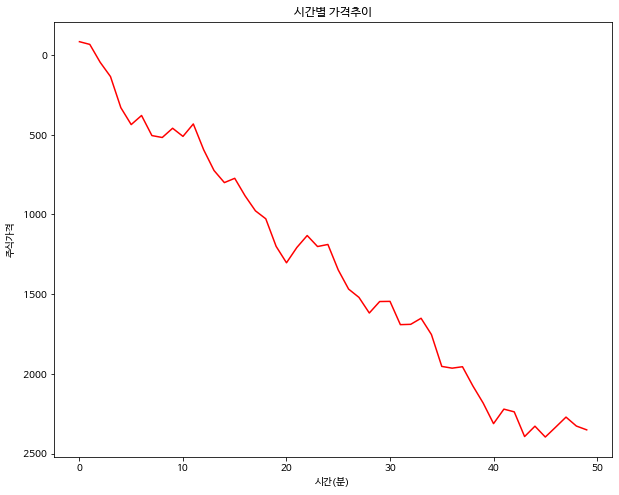

In [20]:
# 데이터 준비
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
data

# 한글을 넣어놓고 그러보면 깨진다
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,8))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격추이')
plt.ylabel('주식가격')
plt.xlabel('시간(분)')

# 분석

In [21]:
import stylecloud

In [29]:
def basic_preprocessing_test(textFile, participant_list):
    # open textFile
    namelength = len(participant_list[1])
    df_to_save = pd.DataFrame(index = range(0,4),columns=['participants', 'time', 'sentence'])
    f = open(f'/content/{textFile}', 'r', encoding='utf-8')
    tmp = 0
    tmp_line = []
    while True:
        line = f.readline()
        if line[:namelength] in participant_list:
            if tmp != 0:
                df_to_save.loc[f'{tmp}'] = tmp_line[:3]
            tmp_line = []
            tmp += 1
            tmp_line.append(line[:namelength])
            tmp_line.append(line[namelength:-1])
        elif line == '\n':
            pass
        else:
            tmp_line.append(line[:-1])
        if not line: break
    # drop na value
    df_to_save = df_to_save.dropna(axis=0)
    return df_to_save

In [33]:
print(len(weekFile), weekFile)
#del weekFile[3]
print(len(participants), participants)
save_df = []

10 ['1주차_천강주.txt', '1주차_최한이.txt', '1주차_김나현.txt', 'tmp.txt', '1주차_양진영.txt', '1주차_윤혜원.txt', '1주차_김태주.txt', '1주차_조현주.txt', '1주차_류성원.txt', '1주차_정수현.txt']
9 [['멘토1', '멘티1', '멘티2', '멘티3'], ['멘토 1', '멘티1', '멘티2'], ['멘토', '멘티1', '멘티2'], ['멘토', '멘티1', '멘티2', '멘티3'], ['멘토1', '멘티1'], ['멘토1', '멘티1'], ['멘토 1', '멘티 2', '멘티 1'], ['멘토 1', '멘티 1', '멘티 2', '멘티 3'], ['멘토', '멘티1', '멘티2']]


In [34]:
for i in range(len(weekFile)):
  save_df.append(basic_preprocessing_test(weekFile[i], participants[i]))

In [35]:
for i in range(len(weekFile)):
  print(save_df[i].head(10))

   participants time                             sentence
1           멘토1                                여러분 들어왔어요.
2           멘토1                                    안녕하세요.
3           멘티1                                    잘 들려요.
4           멘토1                        잘 들려요. 얼굴 좀 보여주실래요
5           멘토1                             카메라는 켜면 좋긴 한데
6           멘티2                                         막
7           멘토1                   자기가 꼭 자기 모습을 보여주기 어렵다. 
8           멘토1                           권영기 학생 한번 말해볼래요
9           멘티3                                    안녕하세요.
10          멘토1       네 잘 들리고요 박서진 학생도 얘기 한번 해볼래요 안녕하세요. 
   participants    time              sentence
1           멘티1   06:04                     네
2           멘티2   06:52                     네
3           멘티2   07:36  그냥 집에 있다가 학원 가고 숙제하고
4           멘티1   07:44             저도 비슷했어요.
5           멘티2   09:27  회원가입하라고 뜨고 로그인하라 뜨는데
6           멘티2   09:32      로그인 버튼이 안 울려졌어요.
7           멘티1   16:53             아니 핸

In [98]:
import openpyxl
import pandas as pd


menti_list = []
mentor_list = []
men = pd.read_excel('/content/220114_matching_data.xlsx')
menti = men.loc[:, ['스누씨드']]
mentor = men.loc[:, ['스누링커']]
menti.head(3)
mentor.head(3)

menti_list = menti['스누씨드'].tolist()
mentor_list = mentor['스누링커'].tolist()
mentor_list = set(mentor_list) #집합set으로 변환
mentor_list = list(mentor_list) #list로 변환

print(menti_list)

['임소을', '박채은', '이호준', '심민찬', '장연주', '김주희', '안민성', '정건우', '조혜랑', '이윤준', '김찬우', '김현아', '백채은', '김하람', '임정진', '김민지', '허수진', '채예준', '강민주', '김도훈', '김민재', '이정민', '송지훈', '변유림', '전희수', '김동혁', '장원빈', '이은서', '신가희', '남궁현', '박세연', '장소영', '홍미르', '박수지', '조재찬', '홍성주', '김우찬', '이최은결', '허고은', '이하빈', '김태희', '김하은', '김예은', '권현기', '박서진', '조원지', '황예진', '이현경', '조원지', '황예진', '이현경', '하혜민', '권혜진']


In [36]:
def mecabTest_wordcloud_with_style(textFile, processed):
    
    tagger = Mecab()
    
    text = ''
    nountext = ''
    for idx, row in processed.iterrows():
        text += row['sentence']
    
    token = tagger.pos(text)
        
    for word, typed in token:
        if typed in ['NNG', 'NNP', 'NNB', 'NR']:
            if word in ['것', '수', '거', '때문']:
                continue
            if word in menti_tor_list:
              continue
            else:
                nountext += (' '+word+' ')

    f = open(r'/content/tmp.txt', 'w')
    f.write(nountext)
    f.close()
    
    # 이 부분만 수정 #<i class="fas fa-landmark"></i>
    stylecloud.gen_stylecloud(file_path = '/content/tmp.txt', icon_name="fab fa-adn", 
                              colors="black", 
                              background_color="white", gradient="horizontal",
                              font_path='/content/malgun.ttf' ,
                              output_name=f'/content/{textFile[:-4]}_wordcloud_with_style.png')
    return nountext

In [37]:
for i in range(len(weekFile)):
  mecabTest_wordcloud_with_style(weekFile[i], save_df[i])

In [111]:
def wordNetwork(ith_save_df):
    # 단락별로 키워드만 남긴 데이터가 필요하다
  
    tagger = Mecab()
    
    text = ''
    nountext = ''
    for idx, row in ith_save_df.iterrows():
        # 줄바꿈 기록을 위함
        text += '----'
        text += row['sentence']
    
    token = tagger.pos(text)

    for word, typed in token:
        if typed in ['NNG', 'NNP', 'NNB', 'NR']:
            if word in ['것', '수', '거', '때문', '권영기'] or len(word) < 2 or \
                word in mentor_list or word in menti_list:
                continue
            else:
                nountext += (' '+word+' ') # 키워드 추출을 위한 구분 기호
        elif word == '--------':
          nountext += '----'
    
    temp_list = nountext.split()
    tmp = []
    final = []
    for i in temp_list:
      if i == '----' or i == '--------':
        final.append(tmp)
        tmp = []
      else:
        tmp.append(i)
    return final

In [112]:
dataset = (wordNetwork(save_df[0]))
dataset = dataset[1:-1]

In [40]:
%pip install apyori

In [114]:
# 연관 규칙 계산
from apyori import apriori
import pandas as pd
result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)

df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length']==2) &
        (df['support'] >= 0.01)].sort_values(by='support', ascending=True)
df = df.iloc[30:]
df.head(40)

Empty DataFrame
Columns: []
Index: []


"\ndf['length'] = df['items'].apply(lambda x:len(x))\ndf = df[(df['length']==2) &\n        (df['support'] >= 0.01)].sort_values(by='support', ascending=True)\ndf = df.iloc[30:]\ndf.head(40)"

In [102]:
#%pip install networkx
# network 그래프 정의
import networkx as nx

G = nx.Graph()
ar = (df['items'])
G.add_edges_from(ar)

try:
  G.remove_edge('기말고사', '중학교')
  G.remove_edge('처리', '일')
  G.remove_edge('해결', '사회')
  G.remove_edge('해결', '문제')
  G.remove_edge('저번', '주')
except:
  pass

pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize-min(nsize)) / (max(nsize)-min(nsize))

#removed_edges = filter(lambda e: True if e[2]['weight'] > 20 else False, G.edges(data=True))
#G.remove_edges_from(list(map(lambda e: (e[0], e[1]), removed_edges)))

In [60]:
print(G)
print(ar)

Graph with 52 nodes and 101 edges
192              (얘기, 학생)
179              (생각, 얘기)
182              (생각, 학생)
128             (권영기, 학생)
114              (생각, 강점)
              ...        
106    (------------, 얘기)
156               (때, 학생)
160               (얘기, 말)
167             (얘기, 박서진)
155               (때, 학년)
Name: items, Length: 101, dtype: object


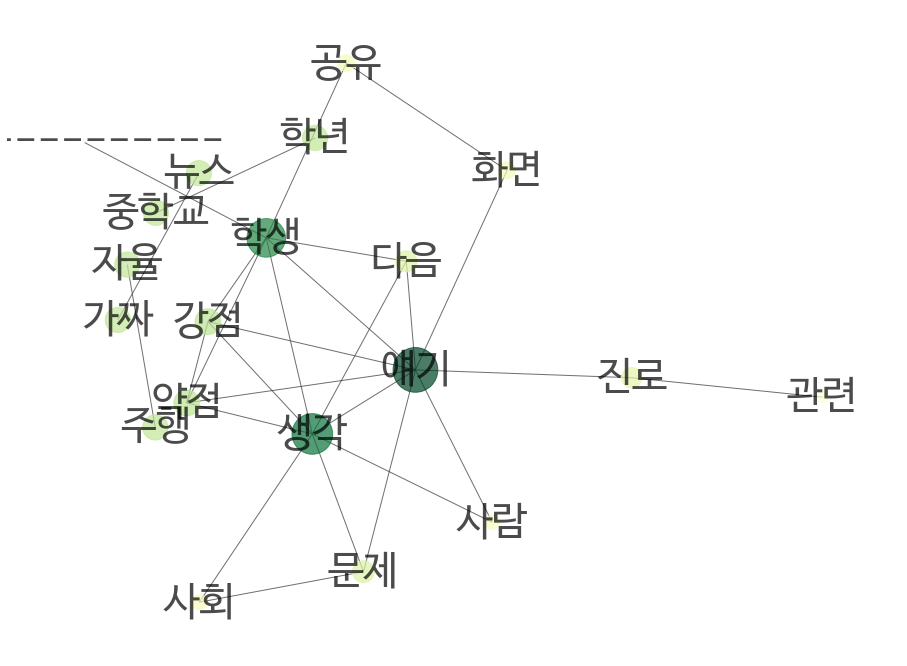

In [105]:
# 레이아웃
import matplotlib.font_manager as fm
from matplotlib import rc

pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(16,12))
plt.axis('off')

nx.draw_networkx(G, pos=pos, font_family='NanumBarunGothic', font_size=40, node_color=list(pr.values()), node_size=nsize, 
                 alpha=0.7, edge_color='.2', cmap=plt.cm.YlGn)
plt.savefig('/trial.png', bbox_inches='tight')

In [59]:
save_df[0].head(5)

,participants,time,sentence
1,멘토1,,여러분 들어왔어요.
2,멘토1,,안녕하세요.
3,멘티1,,잘 들려요.
4,멘토1,,잘 들려요. 얼굴 좀 보여주실래요
5,멘토1,,카메라는 켜면 좋긴 한데


In [83]:
def mecabTest_wordcloud_with_style(textFile, processed):
    
    tagger = Mecab()
    
    text = ''
    nountext = ''
    for idx, row in processed.iterrows():
        text += row['sentence']
    
    token = tagger.pos(text)
        
    for word, typed in token:
        if typed in ['NNG', 'NNP', 'NNB', 'NR']:
            if word in ['것', '수', '거', '때문']:
                continue
            else:
                nountext += (' '+word+' ')

    f = open(r'/content/tmp.txt', 'w')
    f.write(nountext)
    f.close()
    
    # 이 부분만 수정 #<i class="fas fa-landmark"></i>
    stylecloud.gen_stylecloud(file_path = '/content/tmp.txt', icon_name="fab fa-adn", 
                              colors="black", 
                              background_color="white", gradient="horizontal",
                              font_family='NanumBarunGothic' ,
                              output_name=f'/content/{textFile[:-4]}_wordcloud_with_style.png')
mecabTest_wordcloud_with_style(teamList[i], tmpDf)

NameError: ignored

In [37]:
!pip install --upgrade --user matplotlib

     |████████████████████████████████| 11.2 MB 28.4 MB/s 
     |████████████████████████████████| 890 kB 52.8 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Empty DataFrame
Columns: [멘토, 멘티]
Index: []
[321, 150]
        멘토   멘티
멘토1_0  321  150
[0, 256]
         멘토   멘티
멘토1_0   321  150
멘토 1_1    0  256
[0, 236]
         멘토   멘티
멘토1_0   321  150
멘토 1_1    0  256
멘토_2      0  236
[0, 74]
         멘토   멘티
멘토1_0   321  150
멘토 1_1    0  256
멘토_2      0  236
멘토_3      0   74
[177, 113]
         멘토   멘티
멘토1_0   321  150
멘토 1_1    0  256
멘토_2      0  236
멘토_3      0   74
멘토1_4   177  113
[121, 170]
         멘토   멘티
멘토1_0   321  150
멘토 1_1    0  256
멘토_2      0  236
멘토_3      0   74
멘토1_4   177  113
멘토1_5   121  170
[481, 289]
         멘토   멘티
멘토1_0   321  150
멘토 1_1    0  256
멘토_2      0  236
멘토_3      0   74
멘토1_4   177  113
멘토1_5   121  170
멘토 1_6  481  289
[289, 253]
         멘토   멘티
멘토1_0   321  150
멘토 1_1    0  256
멘토_2      0  236
멘토_3      0   74
멘토1_4   177  113
멘토1_5   121  170
멘토 1_6  481  289
멘토 1_7  289  253
[0, 247]
         멘토   멘티
멘토1_0   321  150
멘토 1_1    0  256
멘토_2      0  236
멘토_3      0   74
멘토1_4   177  113
멘토1_5   121  170
멘

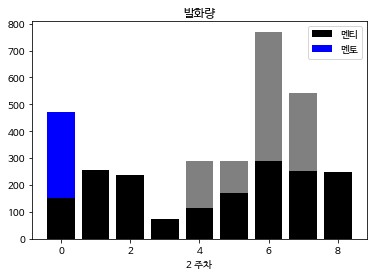

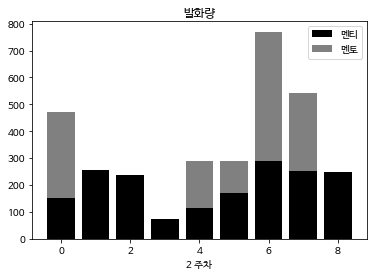

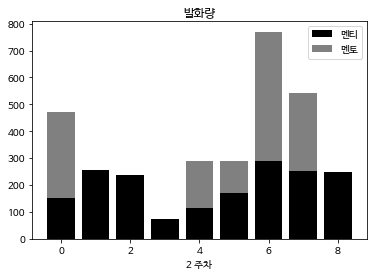

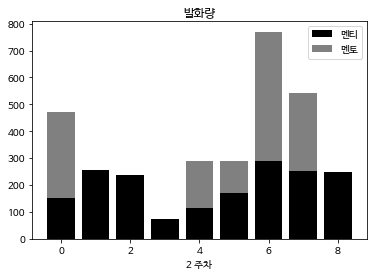

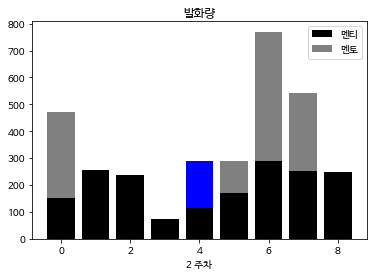

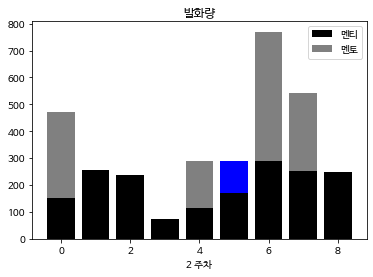

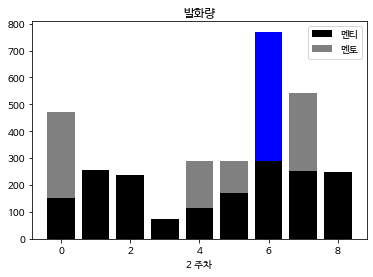

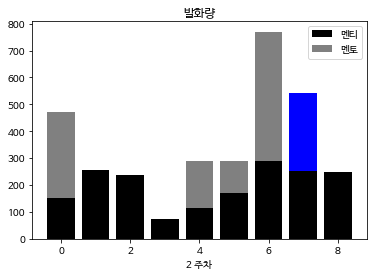

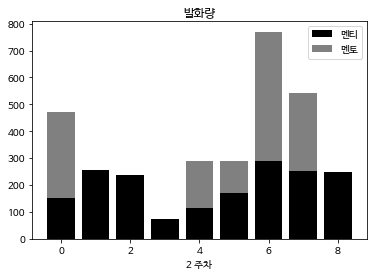

In [85]:
# 한글 폰트 설정
# 멘토 멘티 비율 확인
# index 추가하기 : 

#analysis_all_in_one(weekFile, participants)
def amountPer(weekFile, week):
    portion = pd.DataFrame(columns=['멘토', '멘티'])
    for j in range(len(weekFile)):
      processed = basic_preprocessing_test(weekFile[j], participants[j])

      # 참가자를 멘토와 멘티로 분리
      amount= processed.groupby('participants').count()
      amount['participants'] = amount.index
      amount = amount.drop(['participants', 'time'], axis='columns')
      mentor = 0
      menti = 0

      # 멘티와 멘토의 발화량 계산
      print(portion)
      for i, row in amount.iterrows():
        if i[:2] == '멘토':
          mentor += row['sentence']
        else:
          menti += row['sentence']

      # 조별 비교를 위해 portion DataFrame에 row 대표 이름 추가
      portion.loc[f'{participants[j][0]}_{j}'] = ([mentor, menti])
      print([mentor, menti])

    print(portion)

    # visualize
    for i in range(len(weekFile)):
      Menmax = portion.loc[:,['멘토']].max(axis=0)
      Timax = portion.loc[:,['멘티']].max(axis=0)
      Menti_color = ['gray'] * len(weekFile)
      Mentor_color = ['black'] * len(weekFile)
      Menti_color[i] = 'blue'
      Mentor_color[i] = 'black'
      plt.rc('font', family='NanumBarunGothic')
      plt.bar(range(len(weekFile)), portion['멘티'], color = Mentor_color)
      plt.bar(range(len(weekFile)), portion['멘토'], bottom=portion['멘티'], color=Menti_color)
      plt.title("발화량")
      plt.xlabel(f"{week} 주차")
      plt.legend(('멘티','멘토'))
      plt.show()

amountPer(weekFile, 2)